# IS-RSA for ROIs

In [2]:
import os
os.chdir('/project/3013104.01')
os.getcwd()

'/project/3013104.01'

## Concatenate neutral- and threat-framed volumes 

In [ ]:
import os
import pandas as pd
import shutil

conditions = ['neutral', 'threat']

for condition in conditions:

    output_dir = f'analysis/aural_framing_by_movie_topic/z_roi_node/data/concatenated/{condition}'
    working_dir = 'analysis/aural_framing_by_movie_topic/z_roi_node/data'

    # Delete the output directory if it exists
    if os.path.exists(output_dir):
        shutil.rmtree(output_dir)

    # Create the output directory
    os.makedirs(output_dir)

    # Get a list of all CSV files in the working directory
    csv_files = [filename for filename in os.listdir(working_dir) if filename.endswith('.csv')]

    # Define the order of labels and their corresponding index
    order = {
        f'{condition}_climate_change': 0,
        f'{condition}_healthcare': 1,
        f'{condition}_immigration': 2,
    }

    # Sorting function considering order and 'NA' values
    def custom_sort_key(filename):
        label = filename.rsplit('_', 1)[-1].split('.')[0]
        return order.get(label, len(order)), label

    # Process each subject
    for subject_id in set([filename.split('_')[0] for filename in csv_files]):
        subject_files = [filename for filename in csv_files if filename.startswith(subject_id + '_')]

        # Filter files to include only those with '{condition}' labels
        subject_files = [filename for filename in subject_files if condition in filename]

        if subject_files:  # Check if there are files to concatenate
            # Sort the filtered subject files using the custom sorting function
            subject_files.sort(key=custom_sort_key)

            # Initialize an empty list to store the data
            data_frames = []

            for i, filename in enumerate(subject_files):
                data = pd.read_csv(os.path.join(working_dir, filename), header=None, index_col=None)

                # Remove headers from all dataframes except the first one
                if i != 0:
                    data = data.iloc[1:]

                # Append the data to the list
                data_frames.append(data)

            # Concatenate 
            concatenated_data = pd.concat(data_frames, ignore_index=True)

            # Fill blanks with 'NA'
            concatenated_data = concatenated_data.fillna('NA')

            # Save the concatenated data to the output directory
            output_filename = os.path.join(output_dir, f'{subject_id}_z_concat.csv')
            concatenated_data.to_csv(output_filename, index=False, header=False)

    print("Concatenation and saving complete.")

### Remove 'volume' column if needed

The last column, 'volume', was there to keep track of the order of concatenation across volumes but it's no longer needed.

In [5]:
import os
import pandas as pd

# Directories containing CSV files
directory_paths = [
    'analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral',
    'analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat'
]

for directory_path in directory_paths:
    # Get a list of all CSV files in the directory
    subject_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
    subject_files.sort()
    # Iterate through each CSV file in the current directory
    for file in subject_files:
        filepath = os.path.join(directory_path, file)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(filepath)
        
        # Drop the 'volume' column if it exists
        if 'volume' in df.columns:
            df.drop(columns=['volume'], inplace=True)
            
            # Save the modified DataFrame back to the same CSV file
            df.to_csv(filepath, index=False, na_rep='NA')  # Set na_rep to handle missing values
            
            print(f"'volume' column deleted from {file} in {directory_path}")
        else:
            print(f"'volume' column not found in {file} in {directory_path}")


'volume' column deleted from subject-0023_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0189_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0098_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0200_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0008_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0157_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0143_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column dele

'volume' column deleted from subject-0011_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0220_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0060_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0137_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0091_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0192_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0239_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column dele

'volume' column deleted from subject-0204_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0099_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0054_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0121_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0203_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0049_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0042_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column dele

'volume' column deleted from subject-0084_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0052_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0145_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0217_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0117_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0073_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0016_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column dele

'volume' column deleted from subject-0009_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/neutral
'volume' column deleted from subject-0023_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted from subject-0189_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted from subject-0098_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted from subject-0200_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted from subject-0008_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted from subject-0157_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted fr

'volume' column deleted from subject-0011_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted from subject-0220_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted from subject-0060_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted from subject-0137_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted from subject-0091_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted from subject-0192_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted from subject-0239_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted fro

'volume' column deleted from subject-0204_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted from subject-0099_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted from subject-0054_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted from subject-0121_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted from subject-0203_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted from subject-0049_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted from subject-0042_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted fro

'volume' column deleted from subject-0084_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted from subject-0052_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted from subject-0145_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted from subject-0217_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted from subject-0117_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted from subject-0073_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted from subject-0016_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat
'volume' column deleted fro

'volume' column deleted from subject-0009_z_concat.csv in analysis/aural_framing_by_movie_topic/roi_node/z-scored/data/concatenated/threat


### Plot 

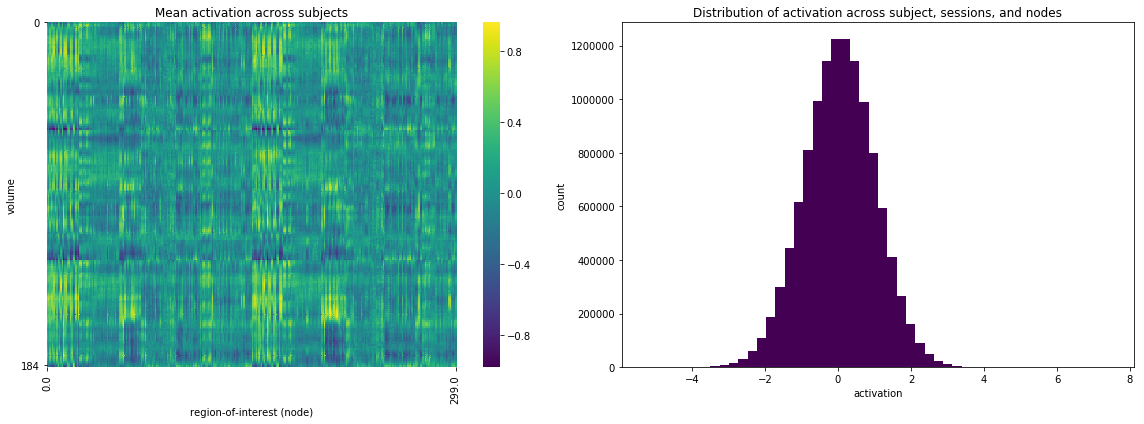

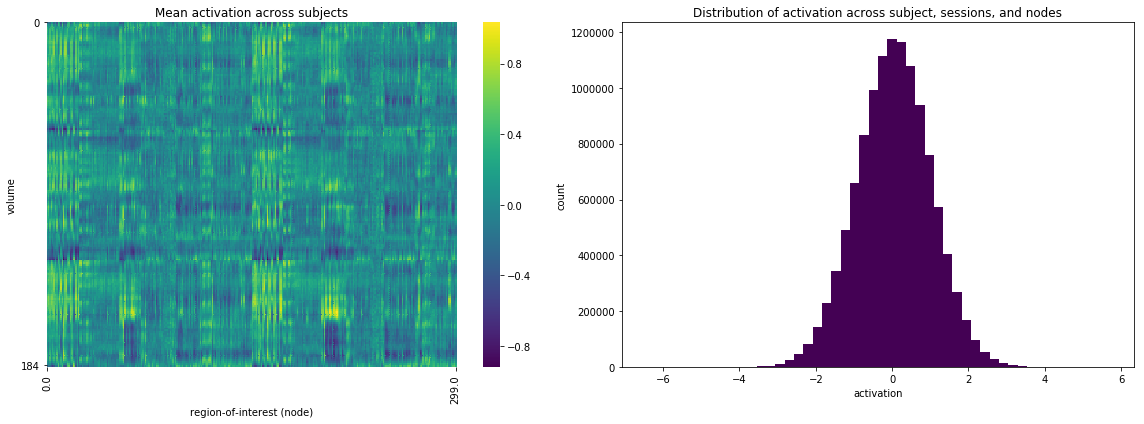

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

for frame in ['neutral', 'threat']:
    # Directory containing CSV files for all subjects
    csv_directory = f'analysis/aural_framing_by_movie_topic/z_roi_node/data/concatenated/{frame}'

    # List all CSV files in the directory
    csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

    # Initialize an empty list to store subject data
    all_subject_data = []

    # Loop through each CSV file (subject) and read data into a list
    for csv_file in csv_files:
        # Exclude 'volume' column while reading the CSV file
        subject_data = pd.read_csv(os.path.join(csv_directory, csv_file), header=0, index_col=None, usecols=lambda col: col.lower() != 'volume')
        all_subject_data.append(subject_data)

    # Stack all subject DataFrames to calculate the mean while ignoring NaN values
    stacked_data = np.stack(all_subject_data, axis=0)
    mean_matrix = np.nanmean(stacked_data, axis=0)

    # Get column and index information from one of the subject DataFrames
    sample_subject_data = all_subject_data[0]  # Assuming all subjects have the same structure

    # Create the plot
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Plot the mean matrix as a heatmap
    sns.heatmap(mean_matrix, cmap='viridis', cbar=True, ax=axs[0])
    x_ticks = [0, mean_matrix.shape[1] - 1]
    y_ticks = [0, mean_matrix.shape[0] - 1]
    axs[0].set_xticks(x_ticks)
    axs[0].set_yticks(y_ticks)
    axs[0].set_xticklabels(sample_subject_data.columns[x_ticks], rotation='vertical')
    axs[0].set_yticklabels(sample_subject_data.index[y_ticks])
    axs[0].set_title('Mean activation across subjects')
    axs[0].set_xlabel('region-of-interest (node)')
    axs[0].set_ylabel('volume')

    # Flatten and clean the data before plotting the distribution
    all_data_flat = np.concatenate(all_subject_data).flatten()
    all_data_flat_cleaned = all_data_flat[~np.isnan(all_data_flat)]

    # Plot histogram for the distribution of all data
    axs[1].hist(all_data_flat_cleaned, bins=50, color='#440154FF')
    axs[1].set_title('Distribution of activation across subject, sessions, and nodes')
    axs[1].set_xlabel('activation')
    axs[1].set_ylabel('count')

    plt.tight_layout()
    plt.show()

## ISC calculation
per condition, per ROI

### Create 3D array

In [10]:
import os
import numpy as np
import pandas as pd

stacked_data = {}  

for frame in ['neutral', 'threat']:
    working_dir = f'analysis/aural_framing_by_movie_topic/z_roi_node/data/concatenated/{frame}'  # Directory with concatenated ROI activation data
    subject_files = [f for f in os.listdir(working_dir) if f.endswith(".csv")]
    subject_files.sort()

    data_list = []

    for filename in subject_files:
        file_path = os.path.join(working_dir, filename)

        data = pd.read_csv(file_path, header=0, index_col=None, usecols=lambda col: col.lower() != 'volume').values
        data_list.append(data)

    stacked_data[frame] = np.stack(data_list, axis=0)

    print(stacked_data[frame].shape)
    # 238 subjects x 185 TRs (i.e., number of timepoints across all runs) x 300 nodes (i.e., ROIs)

(238, 185, 300)
(238, 185, 300)


In [11]:
# Check subject_files sorting. Make sure it's the same order as the questionnaire similarity matrices.
for s in subject_files:
    print(s)

subject-0001_z_concat.csv
subject-0003_z_concat.csv
subject-0004_z_concat.csv
subject-0005_z_concat.csv
subject-0006_z_concat.csv
subject-0007_z_concat.csv
subject-0008_z_concat.csv
subject-0009_z_concat.csv
subject-0010_z_concat.csv
subject-0011_z_concat.csv
subject-0012_z_concat.csv
subject-0013_z_concat.csv
subject-0014_z_concat.csv
subject-0015_z_concat.csv
subject-0016_z_concat.csv
subject-0017_z_concat.csv
subject-0018_z_concat.csv
subject-0019_z_concat.csv
subject-0020_z_concat.csv
subject-0021_z_concat.csv
subject-0022_z_concat.csv
subject-0023_z_concat.csv
subject-0024_z_concat.csv
subject-0025_z_concat.csv
subject-0026_z_concat.csv
subject-0027_z_concat.csv
subject-0028_z_concat.csv
subject-0029_z_concat.csv
subject-0030_z_concat.csv
subject-0031_z_concat.csv
subject-0032_z_concat.csv
subject-0033_z_concat.csv
subject-0034_z_concat.csv
subject-0035_z_concat.csv
subject-0036_z_concat.csv
subject-0037_z_concat.csv
subject-0038_z_concat.csv
subject-0039_z_concat.csv
subject-0040

### Calculate inter-subject neural activation dissimilarity matrices

In [14]:
import numpy as np

for frame in ['neutral', 'threat']:

    n_subs, n_ts, n_nodes = stacked_data[frame].shape

    for node in range(n_nodes):
        print(f"Calculating similarity matrix for node {node + 1}/{n_nodes}")
        node_data = stacked_data[frame][:, :, node]

        similarity_matrix = np.empty((n_subs, n_subs))  # Define similarity_matrix

        for i in range(n_subs):
            for j in range(i, n_subs):  # Only calculate unique edges (i.e.,lower triangle)

                masked_data_i = np.ma.masked_invalid(node_data[i])
                masked_data_j = np.ma.masked_invalid(node_data[j])

                # Calculate Pearson correlation coefficient between two masked arrays 
                correlation = np.ma.corrcoef(masked_data_i, masked_data_j)[0, 1]

                # Convert correlation to dissimilarity (range [0, 2])
                dissimilarity = 1 - correlation 

                similarity_matrix[i, j] = dissimilarity
                similarity_matrix[j, i] = dissimilarity  # Fill upper triangle symmetrically

        # Set the diagonal elements to 0
        np.fill_diagonal(similarity_matrix, 0)

        # Save the similarity matrix to a CSV file
        csv_filename = f"analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_{frame}/similarity_node_{node + 1}.csv"
        np.savetxt(csv_filename, similarity_matrix, delimiter=',')

        print(f"Exported similarity matrix for node {node + 1}/{n_nodes} to {csv_filename}")

Calculating similarity matrix for node 1/300


/opt/anaconda3/5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Warning: converting a masked element to nan.
/opt/anaconda3/5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Warning: converting a masked element to nan.


Exported similarity matrix for node 1/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_1.csv
Calculating similarity matrix for node 2/300
Exported similarity matrix for node 2/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_2.csv
Calculating similarity matrix for node 3/300
Exported similarity matrix for node 3/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_3.csv
Calculating similarity matrix for node 4/300
Exported similarity matrix for node 4/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_4.csv
Calculating similarity matrix for node 5/300
Exported similarity matrix for node 5/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_5.csv
Calculating similarity matrix for node 6/300
Exported similarity matri

Exported similarity matrix for node 43/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_43.csv
Calculating similarity matrix for node 44/300
Exported similarity matrix for node 44/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_44.csv
Calculating similarity matrix for node 45/300
Exported similarity matrix for node 45/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_45.csv
Calculating similarity matrix for node 46/300
Exported similarity matrix for node 46/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_46.csv
Calculating similarity matrix for node 47/300
Exported similarity matrix for node 47/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_47.csv
Calculating similarity matrix for node 48/300
Exported s

Exported similarity matrix for node 85/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_85.csv
Calculating similarity matrix for node 86/300
Exported similarity matrix for node 86/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_86.csv
Calculating similarity matrix for node 87/300
Exported similarity matrix for node 87/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_87.csv
Calculating similarity matrix for node 88/300
Exported similarity matrix for node 88/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_88.csv
Calculating similarity matrix for node 89/300
Exported similarity matrix for node 89/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_89.csv
Calculating similarity matrix for node 90/300
Exported s

Exported similarity matrix for node 126/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_126.csv
Calculating similarity matrix for node 127/300
Exported similarity matrix for node 127/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_127.csv
Calculating similarity matrix for node 128/300
Exported similarity matrix for node 128/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_128.csv
Calculating similarity matrix for node 129/300
Exported similarity matrix for node 129/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_129.csv
Calculating similarity matrix for node 130/300
Exported similarity matrix for node 130/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_130.csv
Calculating similarity matrix for node 131

Exported similarity matrix for node 167/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_167.csv
Calculating similarity matrix for node 168/300
Exported similarity matrix for node 168/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_168.csv
Calculating similarity matrix for node 169/300
Exported similarity matrix for node 169/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_169.csv
Calculating similarity matrix for node 170/300
Exported similarity matrix for node 170/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_170.csv
Calculating similarity matrix for node 171/300
Exported similarity matrix for node 171/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_171.csv
Calculating similarity matrix for node 172

Exported similarity matrix for node 208/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_208.csv
Calculating similarity matrix for node 209/300
Exported similarity matrix for node 209/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_209.csv
Calculating similarity matrix for node 210/300
Exported similarity matrix for node 210/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_210.csv
Calculating similarity matrix for node 211/300
Exported similarity matrix for node 211/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_211.csv
Calculating similarity matrix for node 212/300
Exported similarity matrix for node 212/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_212.csv
Calculating similarity matrix for node 213

Exported similarity matrix for node 249/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_249.csv
Calculating similarity matrix for node 250/300
Exported similarity matrix for node 250/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_250.csv
Calculating similarity matrix for node 251/300
Exported similarity matrix for node 251/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_251.csv
Calculating similarity matrix for node 252/300
Exported similarity matrix for node 252/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_252.csv
Calculating similarity matrix for node 253/300
Exported similarity matrix for node 253/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_253.csv
Calculating similarity matrix for node 254

Exported similarity matrix for node 290/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_290.csv
Calculating similarity matrix for node 291/300
Exported similarity matrix for node 291/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_291.csv
Calculating similarity matrix for node 292/300
Exported similarity matrix for node 292/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_292.csv
Calculating similarity matrix for node 293/300
Exported similarity matrix for node 293/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_293.csv
Calculating similarity matrix for node 294/300
Exported similarity matrix for node 294/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral/similarity_node_294.csv
Calculating similarity matrix for node 295

Exported similarity matrix for node 32/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_32.csv
Calculating similarity matrix for node 33/300
Exported similarity matrix for node 33/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_33.csv
Calculating similarity matrix for node 34/300
Exported similarity matrix for node 34/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_34.csv
Calculating similarity matrix for node 35/300
Exported similarity matrix for node 35/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_35.csv
Calculating similarity matrix for node 36/300
Exported similarity matrix for node 36/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_36.csv
Calculating similarity matrix for node 37/300
Exported simila

Exported similarity matrix for node 74/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_74.csv
Calculating similarity matrix for node 75/300
Exported similarity matrix for node 75/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_75.csv
Calculating similarity matrix for node 76/300
Exported similarity matrix for node 76/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_76.csv
Calculating similarity matrix for node 77/300
Exported similarity matrix for node 77/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_77.csv
Calculating similarity matrix for node 78/300
Exported similarity matrix for node 78/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_78.csv
Calculating similarity matrix for node 79/300
Exported simila

Exported similarity matrix for node 116/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_116.csv
Calculating similarity matrix for node 117/300
Exported similarity matrix for node 117/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_117.csv
Calculating similarity matrix for node 118/300
Exported similarity matrix for node 118/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_118.csv
Calculating similarity matrix for node 119/300
Exported similarity matrix for node 119/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_119.csv
Calculating similarity matrix for node 120/300
Exported similarity matrix for node 120/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_120.csv
Calculating similarity matrix for node 121/300


Exported similarity matrix for node 157/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_157.csv
Calculating similarity matrix for node 158/300
Exported similarity matrix for node 158/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_158.csv
Calculating similarity matrix for node 159/300
Exported similarity matrix for node 159/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_159.csv
Calculating similarity matrix for node 160/300
Exported similarity matrix for node 160/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_160.csv
Calculating similarity matrix for node 161/300
Exported similarity matrix for node 161/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_161.csv
Calculating similarity matrix for node 162/300


Exported similarity matrix for node 198/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_198.csv
Calculating similarity matrix for node 199/300
Exported similarity matrix for node 199/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_199.csv
Calculating similarity matrix for node 200/300
Exported similarity matrix for node 200/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_200.csv
Calculating similarity matrix for node 201/300
Exported similarity matrix for node 201/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_201.csv
Calculating similarity matrix for node 202/300
Exported similarity matrix for node 202/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_202.csv
Calculating similarity matrix for node 203/300


Exported similarity matrix for node 239/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_239.csv
Calculating similarity matrix for node 240/300
Exported similarity matrix for node 240/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_240.csv
Calculating similarity matrix for node 241/300
Exported similarity matrix for node 241/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_241.csv
Calculating similarity matrix for node 242/300
Exported similarity matrix for node 242/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_242.csv
Calculating similarity matrix for node 243/300
Exported similarity matrix for node 243/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_243.csv
Calculating similarity matrix for node 244/300


Exported similarity matrix for node 280/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_280.csv
Calculating similarity matrix for node 281/300
Exported similarity matrix for node 281/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_281.csv
Calculating similarity matrix for node 282/300
Exported similarity matrix for node 282/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_282.csv
Calculating similarity matrix for node 283/300
Exported similarity matrix for node 283/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_283.csv
Calculating similarity matrix for node 284/300
Exported similarity matrix for node 284/300 to analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_threat/similarity_node_284.csv
Calculating similarity matrix for node 285/300


In [ ]:
## Use ROI 

## Perform the IS-RSA analysis separately for the threat-framed and neutral-framed movie data

In [2]:
import os
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from itertools import permutations
import datetime

# Function to create permuted distance matrices
def create_permuted_distance_matrices(original_distance_matrix, n_permutations):
    num_subjects = original_distance_matrix.shape[0]
    permuted_distance_matrices = []
    
    for _ in range(n_permutations):
        # Create a random permutation of the questionnaire scores
        permutation_indices = np.random.permutation(num_subjects)

        # Reconstruct the permuted distance matrix while preserving subject order
        permuted_matrix = original_distance_matrix[permutation_indices][:, permutation_indices]
        
        permuted_distance_matrices.append(permuted_matrix)
    
    return permuted_distance_matrices

dimensions = ['SPSQ_pos','SPSQ_neg'] # 
#start_node_number = 42  # Starting node number

# Today's date
today = datetime.date.today()
formatted_date = today.strftime('%d-%m-%Y')

for dimension in dimensions:
    fmri_similarity_dir = 'analysis/inter-subject_matrices_fmri/roi_node/dissimilarity_matrices_mfmri_neutral' # _neutral
    output_dir = f'analysis/inter-subject_representational_similarity_analysis/neutral_{formatted_date}_roi_node_euclidean_distance/{dimension}' #neutral_

    # Delete output_dir if it exists
    if os.path.exists(output_dir):
        for file in os.listdir(output_dir):
            file_path = os.path.join(output_dir, file)
            try:
                if os.path.isfile(file_path):
                    os.unlink(file_path)
            except Exception as e:
                print(e)
        os.rmdir(output_dir)

    # Create output_dir
    os.makedirs(output_dir, exist_ok=True)

    # List all brain node (dis)similarity files in fmri_similarity_dir
    brain_matrices = [f for f in os.listdir(fmri_similarity_dir) if f.endswith('.csv')]
    #brain_matrices = [f for f in os.listdir(fmri_similarity_dir) if f.endswith('.csv') and int(f.split('_')[2].split('.')[0]) >= start_node_number]

    # Questionnaire distance/dissimilarity matrix 
    questionnaire_matrix_path = f'analysis/inter-subject_matrices_spsq/euclidean_distance_composite/euclidean_distance_matrix_{dimension}.csv'    
    questionnaire_matrix = pd.read_csv(questionnaire_matrix_path, header=0, index_col=0).values
    questionnaire_vector = questionnaire_matrix[np.tril_indices(questionnaire_matrix.shape[0])]

    # How many permutations?
    n_permutations = 10000

    # Create a list of permuted distance matrices to use for all brain matrices
    permuted_distance_matrices = create_permuted_distance_matrices(questionnaire_matrix, n_permutations)

    # Loop through each brain node similarity file
    for brain_matrix_file in brain_matrices:
        print(f"Processing: {brain_matrix_file}")

        brain_matrix = pd.read_csv(os.path.join(fmri_similarity_dir, brain_matrix_file), header=None, index_col=None).values
        brain_vector = brain_matrix[np.tril_indices(brain_matrix.shape[0])]

        # Spearman correlation between vectorized lower triangles of brain and questionnaire matrices
        correlation, p_value = spearmanr(brain_vector, questionnaire_vector, nan_policy='omit')

        # Permutations using the pre-generated list of permuted distance matrices
        correlation_permuted = []
        for permuted_matrix in permuted_distance_matrices:
            permuted_questionnaire_vector = permuted_matrix[np.tril_indices(permuted_matrix.shape[0])]
            corr, _ = spearmanr(brain_vector, permuted_questionnaire_vector, nan_policy='omit')
            correlation_permuted.append(corr)

        p_value_corrected = (np.sum(np.abs(correlation_permuted) >= np.abs(correlation)) + 1) / (n_permutations + 1)

        # Dataframe to store results
        result_df = pd.DataFrame({
            'node_similarity_matrix': [brain_matrix_file],
            'spearman_r': [correlation],
            'p_uncorrected': [p_value],
            'p_permuted': [p_value_corrected]
        })

        # Save in output_dir
        output_file = os.path.splitext(brain_matrix_file)[0] + '_isrsa.csv'
        result_df.to_csv(os.path.join(output_dir, output_file), index=False)

        print(f"Complete: {output_file}")

Processing: similarity_node_1.csv
Complete: similarity_node_1_isrsa.csv
Processing: similarity_node_2.csv
Complete: similarity_node_2_isrsa.csv
Processing: similarity_node_3.csv
Complete: similarity_node_3_isrsa.csv
Processing: similarity_node_4.csv
Complete: similarity_node_4_isrsa.csv
Processing: similarity_node_5.csv
Complete: similarity_node_5_isrsa.csv
Processing: similarity_node_6.csv
Complete: similarity_node_6_isrsa.csv
Processing: similarity_node_7.csv
Complete: similarity_node_7_isrsa.csv
Processing: similarity_node_8.csv
Complete: similarity_node_8_isrsa.csv
Processing: similarity_node_9.csv
Complete: similarity_node_9_isrsa.csv
Processing: similarity_node_10.csv
Complete: similarity_node_10_isrsa.csv
Processing: similarity_node_11.csv
Complete: similarity_node_11_isrsa.csv
Processing: similarity_node_12.csv
Complete: similarity_node_12_isrsa.csv
Processing: similarity_node_13.csv
Complete: similarity_node_13_isrsa.csv
Processing: similarity_node_14.csv
Complete: similarity_

Complete: similarity_node_112_isrsa.csv
Processing: similarity_node_113.csv
Complete: similarity_node_113_isrsa.csv
Processing: similarity_node_114.csv
Complete: similarity_node_114_isrsa.csv
Processing: similarity_node_115.csv
Complete: similarity_node_115_isrsa.csv
Processing: similarity_node_116.csv
Complete: similarity_node_116_isrsa.csv
Processing: similarity_node_117.csv
Complete: similarity_node_117_isrsa.csv
Processing: similarity_node_118.csv
Complete: similarity_node_118_isrsa.csv
Processing: similarity_node_119.csv
Complete: similarity_node_119_isrsa.csv
Processing: similarity_node_120.csv
Complete: similarity_node_120_isrsa.csv
Processing: similarity_node_121.csv
Complete: similarity_node_121_isrsa.csv
Processing: similarity_node_122.csv
Complete: similarity_node_122_isrsa.csv
Processing: similarity_node_123.csv
Complete: similarity_node_123_isrsa.csv
Processing: similarity_node_124.csv
Complete: similarity_node_124_isrsa.csv
Processing: similarity_node_125.csv
Complete: si

Complete: similarity_node_220_isrsa.csv
Processing: similarity_node_221.csv
Complete: similarity_node_221_isrsa.csv
Processing: similarity_node_222.csv
Complete: similarity_node_222_isrsa.csv
Processing: similarity_node_223.csv
Complete: similarity_node_223_isrsa.csv
Processing: similarity_node_224.csv
Complete: similarity_node_224_isrsa.csv
Processing: similarity_node_225.csv
Complete: similarity_node_225_isrsa.csv
Processing: similarity_node_226.csv
Complete: similarity_node_226_isrsa.csv
Processing: similarity_node_227.csv
Complete: similarity_node_227_isrsa.csv
Processing: similarity_node_228.csv
Complete: similarity_node_228_isrsa.csv
Processing: similarity_node_229.csv
Complete: similarity_node_229_isrsa.csv
Processing: similarity_node_230.csv
Complete: similarity_node_230_isrsa.csv
Processing: similarity_node_231.csv
Complete: similarity_node_231_isrsa.csv
Processing: similarity_node_232.csv
Complete: similarity_node_232_isrsa.csv
Processing: similarity_node_233.csv
Complete: si

Complete: similarity_node_29_isrsa.csv
Processing: similarity_node_30.csv
Complete: similarity_node_30_isrsa.csv
Processing: similarity_node_31.csv
Complete: similarity_node_31_isrsa.csv
Processing: similarity_node_32.csv
Complete: similarity_node_32_isrsa.csv
Processing: similarity_node_33.csv
Complete: similarity_node_33_isrsa.csv
Processing: similarity_node_34.csv
Complete: similarity_node_34_isrsa.csv
Processing: similarity_node_35.csv
Complete: similarity_node_35_isrsa.csv
Processing: similarity_node_36.csv
Complete: similarity_node_36_isrsa.csv
Processing: similarity_node_37.csv
Complete: similarity_node_37_isrsa.csv
Processing: similarity_node_38.csv
Complete: similarity_node_38_isrsa.csv
Processing: similarity_node_39.csv
Complete: similarity_node_39_isrsa.csv
Processing: similarity_node_40.csv
Complete: similarity_node_40_isrsa.csv
Processing: similarity_node_41.csv
Complete: similarity_node_41_isrsa.csv
Processing: similarity_node_42.csv
Complete: similarity_node_42_isrsa.csv

Complete: similarity_node_139_isrsa.csv
Processing: similarity_node_140.csv
Complete: similarity_node_140_isrsa.csv
Processing: similarity_node_141.csv
Complete: similarity_node_141_isrsa.csv
Processing: similarity_node_142.csv
Complete: similarity_node_142_isrsa.csv
Processing: similarity_node_143.csv
Complete: similarity_node_143_isrsa.csv
Processing: similarity_node_144.csv
Complete: similarity_node_144_isrsa.csv
Processing: similarity_node_145.csv
Complete: similarity_node_145_isrsa.csv
Processing: similarity_node_146.csv
Complete: similarity_node_146_isrsa.csv
Processing: similarity_node_147.csv
Complete: similarity_node_147_isrsa.csv
Processing: similarity_node_148.csv
Complete: similarity_node_148_isrsa.csv
Processing: similarity_node_149.csv
Complete: similarity_node_149_isrsa.csv
Processing: similarity_node_150.csv
Complete: similarity_node_150_isrsa.csv
Processing: similarity_node_151.csv
Complete: similarity_node_151_isrsa.csv
Processing: similarity_node_152.csv
Complete: si

Complete: similarity_node_247_isrsa.csv
Processing: similarity_node_248.csv
Complete: similarity_node_248_isrsa.csv
Processing: similarity_node_249.csv
Complete: similarity_node_249_isrsa.csv
Processing: similarity_node_250.csv
Complete: similarity_node_250_isrsa.csv
Processing: similarity_node_251.csv
Complete: similarity_node_251_isrsa.csv
Processing: similarity_node_252.csv
Complete: similarity_node_252_isrsa.csv
Processing: similarity_node_253.csv
Complete: similarity_node_253_isrsa.csv
Processing: similarity_node_254.csv
Complete: similarity_node_254_isrsa.csv
Processing: similarity_node_255.csv
Complete: similarity_node_255_isrsa.csv
Processing: similarity_node_256.csv
Complete: similarity_node_256_isrsa.csv
Processing: similarity_node_257.csv
Complete: similarity_node_257_isrsa.csv
Processing: similarity_node_258.csv
Complete: similarity_node_258_isrsa.csv
Processing: similarity_node_259.csv
Complete: similarity_node_259_isrsa.csv
Processing: similarity_node_260.csv
Complete: si

## Concatenate output files across nodes

In [4]:
import os
import pandas as pd

dimensions = ['SPSQ_pos', 'SPSQ_neg'] #['SPSQ_sum', 
isrsa_dir = 'analysis/inter-subject_representational_similarity_analysis/threat_03-01-2024_roi_node_euclidean_distance'
node_range = range(1, 301)

for dim in dimensions:
    # Initialize an empty list to store dataframes for each dimension
    dfs = []

    # Loop through each node
    for node in node_range:
        # Define the filename pattern
        filename = f'similarity_node_{node}_isrsa.csv'
        filepath = os.path.join(isrsa_dir, dim, filename)

        # Check if the file exists
        if os.path.exists(filepath):
            df = pd.read_csv(filepath, header=0, index_col=None)

            # Add 'node' column
            df['node'] = node-1

            # Append the dataframe to the list for this dimension
            dfs.append(df)

    # Concatenate dataframes in the list vertically
    concatenated_df = pd.concat(dfs, ignore_index=True)

    # Save the concatenated dataframe with only the header of the first file
    output_filename = os.path.join(isrsa_dir, f'{dim}_isrsa_concat.csv')
    concatenated_df.to_csv(output_filename, index=False)

    print(f"Concatenated data for {dim} saved to {output_filename}")

Concatenated data for SPSQ_pos saved to analysis/inter-subject_representational_similarity_analysis/threat_03-01-2024_roi_node_euclidean_distance/SPSQ_pos_isrsa_concat.csv
Concatenated data for SPSQ_neg saved to analysis/inter-subject_representational_similarity_analysis/threat_03-01-2024_roi_node_euclidean_distance/SPSQ_neg_isrsa_concat.csv


## False discovery rate correction across nodes

In [8]:
import os
import pandas as pd
from statsmodels.stats.multitest import fdrcorrection

dimensions = ['SPSQ_pos', 'SPSQ_neg'] #'SPSQ_sum', 
isrsa_dir = 'analysis/inter-subject_representational_similarity_analysis/threat_03-01-2024_roi_node_euclidean_distance'

for dim in dimensions:
    # Load the concatenated dataframe
    #input_filename = os.path.join(isrsa_dir, f'{dim}_isrsa_concat.csv') 
    input_filename = os.path.join(isrsa_dir, 'SPSQ_neg_isrsa_concat_salience.csv')
    concatenated_df = pd.read_csv(input_filename, header=0, index_col=None)

    # Column names
    p_value_column = 'p_permuted'
    fdr_column = 'p_permuted_fdr' # FDR adjusted p-values across nodes
    #fwe_column = 'p_permuted_bonf'  # FWE adjusted p-values across dimensions 

    # Get the p-values from the specified column
    p_values = concatenated_df[p_value_column]

    # Perform FDR correction
    rejected, p_values_fdr = fdrcorrection(p_values)

    # Add the FDR-corrected p-values as a new column
    concatenated_df[fdr_column] = p_values_fdr

    # Calculate and add the FWE adjusted p-values column
    #fwe_adjusted_p_values = p_values_fdr * 6
    #concatenated_df[fwe_column] = fwe_adjusted_p_values

    # Save the updated dataframe
    concatenated_df.to_csv(input_filename, index=False)

    print(f"FDR-corrected and FWE adjusted p-values added to {input_filename}")

FDR-corrected and FWE adjusted p-values added to analysis/inter-subject_representational_similarity_analysis/threat_03-01-2024_roi_node_euclidean_distance/SPSQ_neg_isrsa_concat_salience.csv
FDR-corrected and FWE adjusted p-values added to analysis/inter-subject_representational_similarity_analysis/threat_03-01-2024_roi_node_euclidean_distance/SPSQ_neg_isrsa_concat_salience.csv


## Plot bar plots of the ROI-specific IS-RSA effects

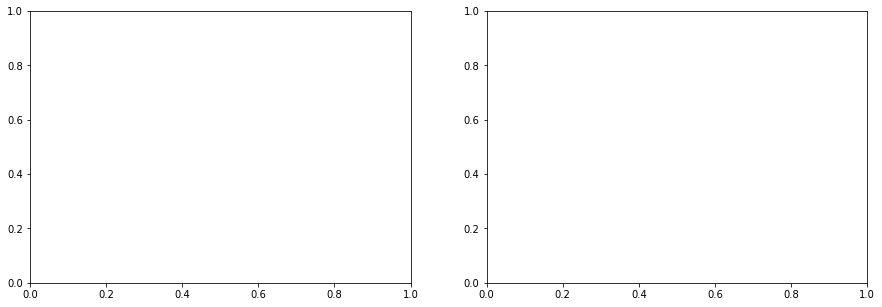

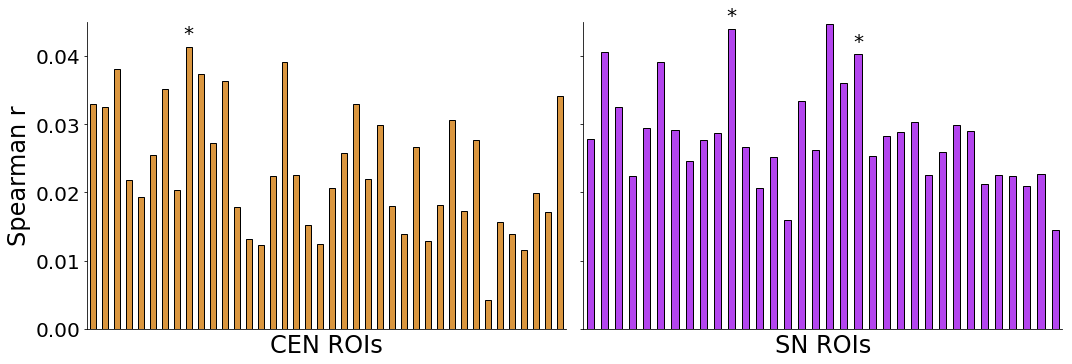

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the paths to your CSV files stored in 'data' variable
networks = ['control', 'salience']

# Define colors for each network
colors = {'control': '#DA963F', 'salience': '#B345EE'}

# Create subplots
fig, axes = plt.subplots(1, len(networks), figsize=(15, 5))

# Iterate over networks again to create bar plots
for i, network in enumerate(networks):
    data_path = f'analysis/inter-subject_representational_similarity_analysis/threat_03-01-2024_roi_node_euclidean_distance/SPSQ_neg_isrsa_concat_{network}.csv'
    
    # Load data using pandas
    df = pd.read_csv(data_path)
    
    # Plot bar chart with specified edge color and colormap for filling
    ax = axes[i]
    bars = df.plot(kind='bar', y='spearman_r', ax=ax, legend=False, edgecolor='black', color=colors[network])
    
    # Add labels and title
    ax.set_xlabel('ROIs', fontsize=24)
    
    # Remove top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Remove x-axis ticks and tick labels
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    
    # Remove y-axis label and set tick label font size for the salience network plot
    if network == 'salience':
        ax.set_ylabel('')
        ax.set_yticklabels([])
        ax.set_xlabel('SN ROIs', fontsize=24)
    elif network == 'control':
        ax.set_ylabel('Spearman r', fontsize=24)
        ax.tick_params(axis='y', labelsize=20)
        ax.set_xlabel('CEN ROIs', fontsize=24)
    
    # Add asterisks above bars with p_permuted < 0.05
    for index, row in df.iterrows():
        if row['p_permuted'] < 0.05:
            ax.text(index, row['spearman_r'] + 0.0005, '*', ha='center', va='bottom', fontsize=20)

# Set the same y-axis limit for all subplots
for ax in axes:
    ax.set_ylim(0, 0.045)
    ax.set_yticks([0, 0.01, 0.02, 0.03, 0.04])

# Adjust layout and show the plots
plt.tight_layout()

# Save the figure as a PDF
plt.savefig('analysis/plots/isrsa_roi_spearman_barplots.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()
